# 🧬 Evolutionary TSP Solver - Demo

Bu notebook, geliştirdiğimiz **Evolutionary TSP** kütüphanesini kullanarak Gezgin Satıcı Problemini (TSP) çözer ve sonuçları görselleştirir.

### İçerik:
1. Kütüphaneleri Yükle
2. Veriyi (.tsp) Oku
3. Genetik Algoritmayı Yapılandır ve Çalıştır
4. Sonuçları (Rota ve Başarı Grafiği) Çizdir

In [1]:
# Gerekli kütüphaneler
import os
import sys
import matplotlib.pyplot as plt

In [6]:
# Proje ana dizinini path'e ekle (src klasörünü görebilmesi için)
# Not: Bu notebook 'notebooks/' klasöründe olduğu için bir üst dizine ('..') çıkıyoruz.
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

# Kendi yazdığımız modülleri import ediyoruz
from modules.utils import read_tsp_file
from modules.ga_engine import GeneticAlgorithm

### 1. Veriyi Yükle
Proje içindeki `data/` klasöründen bir TSP dosyası seçiyoruz.

In [ ]:
# Veri dosyasının yolu
filename = os.path.join(project_root, 'data', 'berlin52.tsp')

if not os.path.exists(filename):
    print(f"Hata: Dosya bulunamadı -> {filename}")
else:
    cities = read_tsp_file(filename)
    print(f"{len(cities)} adet şehir yüklendi.")

✅ 52 adet şehir yüklendi.


### 2. Algoritmayı Yapılandır
Aşağıdaki parametreleri değiştirerek algoritmanın performansını test edebilirsin.

* **local_search_method**: `'2opt'` veya `'3opt'` seçerek hibrit yapıyı test et.

In [8]:
# HİPERPARAMETRELER
POP_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.01
ELITE_SIZE = 2

# YÖNTEM SEÇİMLERİ
SELECTION = "tournament"   # Seçenekler: tournament, roulette, rank
CROSSOVER = "ordered"      # Seçenekler: ordered, cycle
MUTATION = "inversion"     # Seçenekler: inversion, swap, insert
LOCAL_SEARCH = "2opt"      # Seçenekler: none, 2opt, 3opt

# Motoru Başlat
ga = GeneticAlgorithm(
    cities=cities,
    pop_size=POP_SIZE,
    mutation_rate=MUTATION_RATE,
    elite_size=ELITE_SIZE,
    selection_method=SELECTION,
    crossover_method=CROSSOVER,
    mutation_method=MUTATION,
    local_search_method=LOCAL_SEARCH
)

print("🧬 Genetik Algoritma Hazır.")

🧬 Genetik Algoritma Hazır.


### 3. Evrimi Başlat
Algoritma çalışırken ilerleme çubuğu (progress bar) görünecektir.

In [9]:
print("🚀 Evrim Başlıyor...")

# verbose=1 -> Progress bar gösterir
best_route, best_distance = ga.run(generations=GENERATIONS, verbose=1)

print(f"\n🏆 En İyi Mesafe: {best_distance:.2f}")

🚀 Evrim Başlıyor...


Evolving: 100%|██████████| 200/200 [00:00<00:00, 209.71it/s]


Applying 2opt optimization to the best route...
Local Search Improved: 8697.45

🏆 En İyi Mesafe: 8697.45


### 4. Sonuçları Görselleştir
Bulunan en iyi rotayı ve algoritmanın gelişim grafiğini çizdirelim.

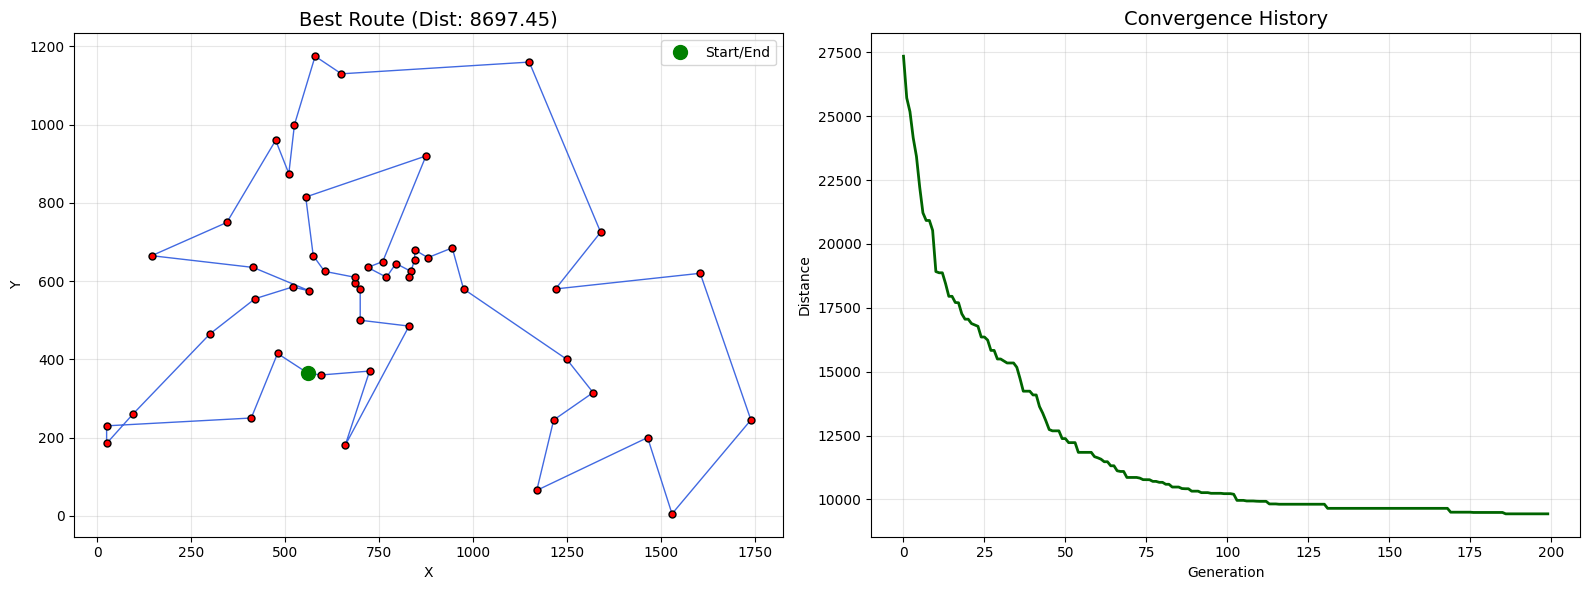

In [10]:
def plot_results(cities, route, history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- Grafik 1: Rota Haritası ---
    x = [cities[i].x for i in route]
    y = [cities[i].y for i in route]
    # Rotayı kapat (başa dön)
    x.append(x[0])
    y.append(y[0])
    
    ax[0].plot(x, y, 'o-', mfc='r', mec='k', markersize=5, linewidth=1, color='royalblue')
    ax[0].plot(x[0], y[0], 'go', markersize=10, label='Start/End')
    ax[0].set_title(f"Best Route (Dist: {best_distance:.2f})", fontsize=14)
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[0].legend()
    ax[0].grid(True, alpha=0.3)

    # --- Grafik 2: Fitness Geçmişi ---
    ax[1].plot(history, color='darkgreen', linewidth=2)
    ax[1].set_title("Convergence History", fontsize=14)
    ax[1].set_xlabel("Generation")
    ax[1].set_ylabel("Distance")
    ax[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Çizdir
plot_results(cities, best_route, ga.fitness_history)